Nama: Siti Viona Indah Swari

Email: 1810817220011@mhs.ulm.ac.id

In [ ]:
#import librari yang diperlukan
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import zipfile,os,shutil

Dataset yang dipakai haruslah dataset berikut : rockpaperscissors, atau gunakan link ini pada wget command: https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-04-10 10:08:40--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.74MB/s    in 3m 47s  

2021-04-10 10:12:28 (1.36 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# melakukan ekstraksi pada file zip
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [ ]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [ ]:
# membuat direktori rock, paper, dan scissors pada direktori data training
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
# membuat direktori rock, paper, dan scissors pada direktori data validasi
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

In [ ]:
os.mkdir(train_rock)
os.mkdir(train_paper)
os.mkdir(train_scissors)
os.mkdir(val_rock)
os.mkdir(val_paper)
os.mkdir(val_scissors)

Dataset harus dibagi menjadi train set dan validation set.

Ukuran validation set harus 40% dari total dataset (data training memiliki 1314 sampel, dan data validasi sebanyak 874 sampel).

In [ ]:
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.40)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.40)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.40)

In [ ]:
for file in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(train_rock, file))
for file in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(train_paper,file))
for file in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(train_scissors,file))
for file in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(val_rock,file))
for file in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(val_paper,file))
for file in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(val_scissors,file))

Harus mengimplementasikan augmentasi gambar.

Menggunakan image data generator.

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
)
test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # direktori data latih
    target_size=(150,150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size= 32,
    # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, # direktori data validasi
    target_size = (150,150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size = 32,
    # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


Model harus menggunakan model sequential.

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

model.summary()
# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy'
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

Pelatihan model tidak melebihi waktu 30 menit.

In [ ]:
# latih model dengan model.fit 
history = model.fit(
    train_generator,
    steps_per_epoch = 41, # berapa batch yang akan dieksekusi pada setiap epoch
    epochs = 20, # tambahkan eposchs jika akurasi model belum optimal
    validation_data = validation_generator, # menampilkan akurasi pengujian data validasi
    validation_steps = 27, # berapa batch yang akan dieksekusi pada setiap epoch
    verbose =2
)

Epoch 1/20
41/41 - 66s - loss: 1.1034 - accuracy: 0.4581 - val_loss: 0.7718 - val_accuracy: 0.7326
Epoch 2/20
41/41 - 64s - loss: 0.5957 - accuracy: 0.7713 - val_loss: 0.3099 - val_accuracy: 0.8947
Epoch 3/20
41/41 - 64s - loss: 0.3589 - accuracy: 0.8567 - val_loss: 0.2351 - val_accuracy: 0.9248
Epoch 4/20
41/41 - 64s - loss: 0.2582 - accuracy: 0.9078 - val_loss: 0.1747 - val_accuracy: 0.9444
Epoch 5/20
41/41 - 64s - loss: 0.2000 - accuracy: 0.9398 - val_loss: 0.1394 - val_accuracy: 0.9572
Epoch 6/20
41/41 - 64s - loss: 0.1307 - accuracy: 0.9543 - val_loss: 0.1130 - val_accuracy: 0.9583
Epoch 7/20
41/41 - 64s - loss: 0.1426 - accuracy: 0.9527 - val_loss: 0.1997 - val_accuracy: 0.9363
Epoch 8/20
41/41 - 64s - loss: 0.1331 - accuracy: 0.9543 - val_loss: 0.1075 - val_accuracy: 0.9641
Epoch 9/20
41/41 - 64s - loss: 0.0954 - accuracy: 0.9642 - val_loss: 0.1106 - val_accuracy: 0.9699
Epoch 10/20
41/41 - 64s - loss: 0.0928 - accuracy: 0.9695 - val_loss: 0.0663 - val_accuracy: 0.9769
Epoch 11/

Akurasi dari model minimal 85%.

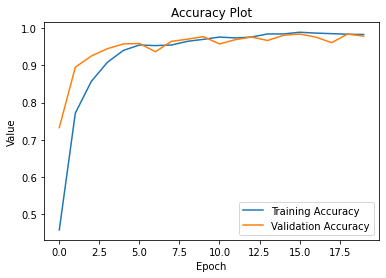

In [ ]:
from matplotlib import pyplot as plt
#accuracy train & validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

Dapat memprediksi gambar yang diunggah ke Colab

Saving SantiContreras.png to SantiContreras.png
SantiContreras.png
paper


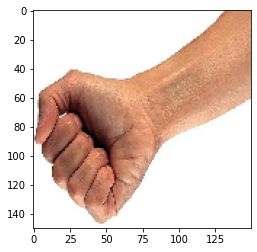

In [ ]:
#main driver
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')